In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [70]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [71]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [72]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [73]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [74]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [75]:
# Create our session (link) from Python to the DB
session = Session(engine)
# columnsmeasurement = session.query(measurement).first()
# print(columnsmeasurement.__dict__)

# columnsstation = session.query(station).first()
# print(columnsstation.__dict__)

# def printResults(queryResult, varList):
#     for row in queryResult:
#         strList = ""
#         for index in range(len(varList)):
#             strList += "  " + f"{row[index]}"
#         print(strList)

# joinColumns = [measurement.id, station.id, measurement.station, station.name, measurement.date, measurement.tobs, measurement.prcp,  station.latitude, station.longitude, station.elevation]

# queryJoin = session.query(*joinColumns).filter(measurement.station == station.station)
# printResults(queryJoin, joinColumns)


# Exploratory Precipitation Analysis

In [92]:
# Find the most recent date in the data set.
meaTableQ = session.query(measurement.date).order_by(measurement.date.desc()).first()
meaTableQ

('2010-01-01',)

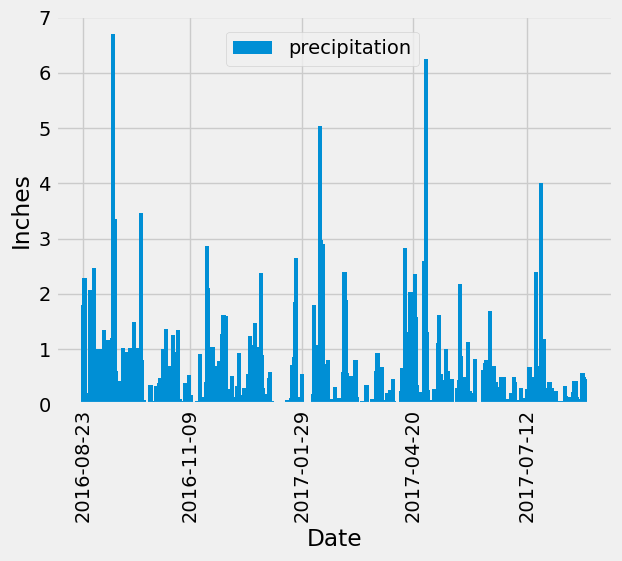

In [91]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
mostRecentDate = dt.date(int(meaTableQ[0][:4]), int(meaTableQ[0][5:7]), int(meaTableQ[0][8:10]))
oneYearBefore = mostRecentDate - dt.timedelta(days=365)
oneYearBefore


# Perform a query to retrieve the data and precipitation scores
# NOTE: 1) The instructions say not to use a variable here for this query's date and 2) the instructions show 
# a plot that has data for 2016-08-23 eventhoough it 365 days is technically 2016-08-24
recent12Months = session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23')


# Save the query results as a Pandas DataFrame. Explicitly set the column names
twelveMonthRain_df = pd.DataFrame(recent12Months, columns=['Date', 'Precipitation (Inches)'])


# Sort the dataframe by date
srt12Month_df = twelveMonthRain_df.sort_values('Date')
# Remove NAN values for precipitation
cleanSrt12Month_df = srt12Month_df.loc[srt12Month_df['Precipitation (Inches)'].isna() != True]


# Use Pandas Plotting with Matplotlib to plot the data
x = cleanSrt12Month_df['Date']
y = cleanSrt12Month_df['Precipitation (Inches)']

plt.bar(x, y, width=3)
plt.xticks(x[::455], rotation = 90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(labels={'precipitation':"blue"}, loc=(.305, .87))
plt.show()

In [82]:
# Use Pandas to calculate the summary statistics for the precipitation data
cleanSrt12Month_df.describe()

,Precipitation (Inches)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [83]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [84]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
mostActiveStations = session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station).order_by(func.count(measurement.date).desc()).all()
mostActiveStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [85]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowestHighestAverageQuery = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == mostActiveStations[0][0])
lowestHighestAverageQuery.all()

[(54.0, 85.0, 71.66378066378067)]

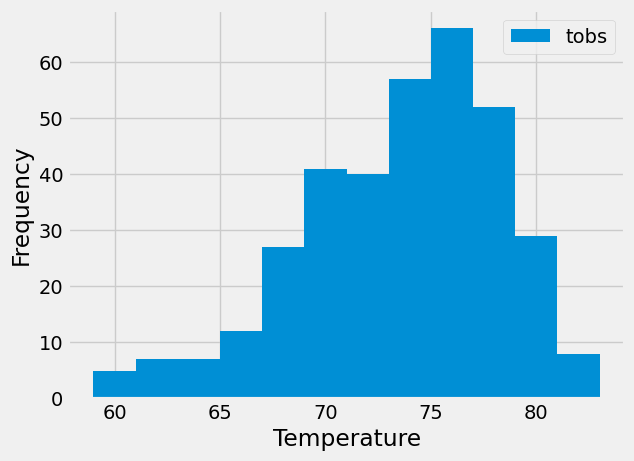

In [86]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperaturesMostActiveStation = session.query(measurement.tobs).filter(measurement.station == mostActiveStations[0][0]).filter(measurement.date > oneYearBefore)
tempMostActiveStation_df = pd.DataFrame(temperaturesMostActiveStation, columns=['tobs'])

plt.hist(tempMostActiveStation_df['tobs'], bins = 12)
plt.legend(labels={'tobs':"blue"}, loc='upper right')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [87]:
# Close Session
session.close()